In [1]:
import numpy as np  
import matplotlib.pyplot as plt    

In [2]:
l = 100
mutation_rate = 1/l
x = np.random.randint(2,size=l)
np.random.seed(2022)

### Exercise 4.a)

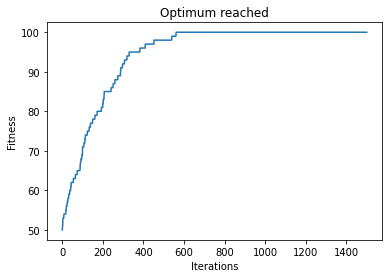

In [3]:
def loop(x,iter=1500):
    x_fit = np.count_nonzero(x==1)
    fitness_hist = [x_fit]

    for i in range(iter):
        # b
        xm = x
        invert = np.random.choice([True, False], l, p=[mutation_rate, 1-mutation_rate])
        xm = np.logical_xor(x, invert)

        xm_fit = np.count_nonzero(xm==1)
        # c
        if x_fit < xm_fit:
            x = xm
            x_fit = xm_fit

        fitness_hist.append(x_fit)

    return x, fitness_hist

x_f, f = loop(x)
plt.plot(f)
plt.ylabel("Fitness")
plt.xlabel("Iterations")
if f[-1]==l: plt.title("Optimum reached")
else: plt.title(f"Optimum NOT reached, best fitness={np.max(f)}")


We can see that as the fitness increases, our bit string takes longer to improve its fitness, because it need to mutate a bit in concrete each time for the final iterations.

### Exercise 4.b)

8 runs out of 10 have reached the optimum (fitness = 100)


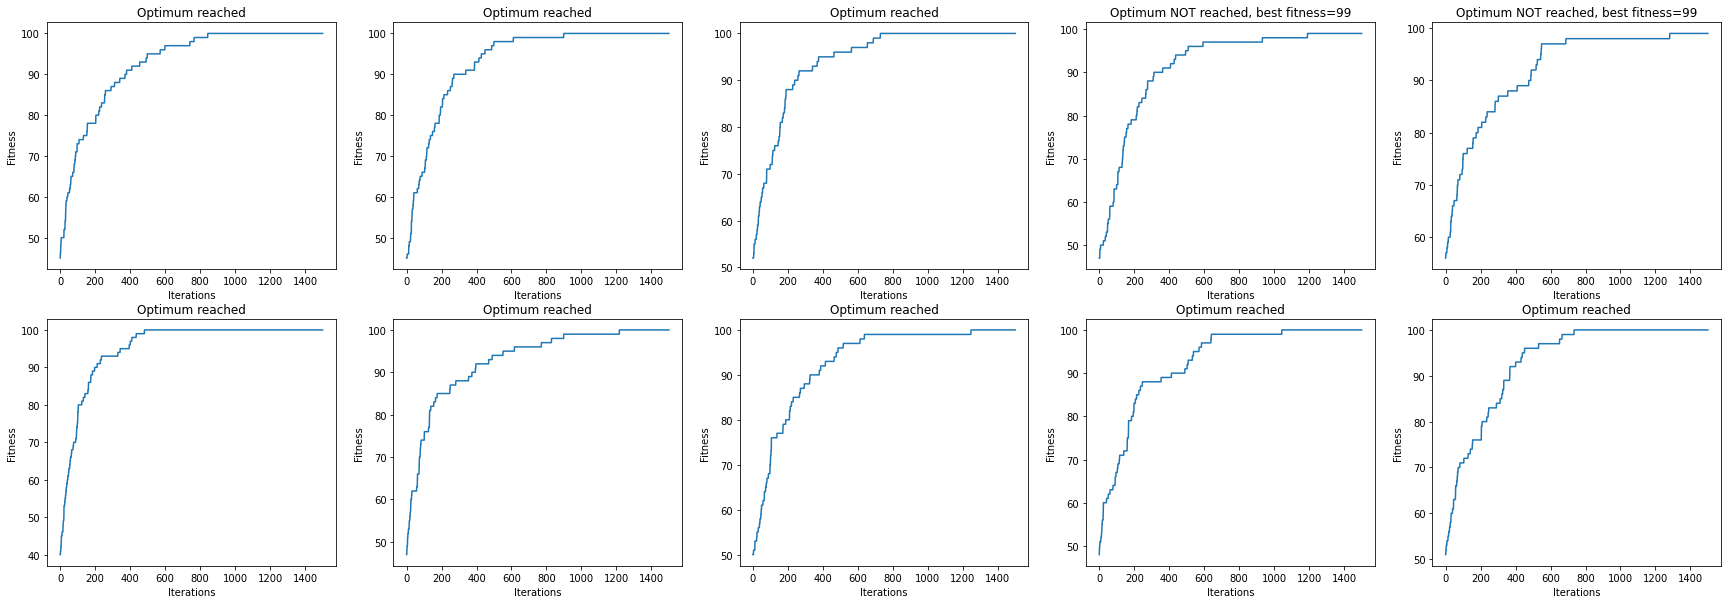

In [4]:
fig, ax = plt.subplots(2, 5,figsize=(30,10))
optimum = 0
for i in range(2):
    for j in range(5):
        x = np.random.randint(2,size=l)
        # print(x)
        final_xs, f =loop(x)
        ax[i][j].plot(f)
        ax[i][j].set_ylabel("Fitness")
        ax[i][j].set_xlabel("Iterations")
        if f[-1]==l: 
            ax[i][j].set_title("Optimum reached")
            optimum += 1
        else: ax[i][j].set_title(f"Optimum NOT reached, best fitness={np.max(f)}")

print(f"{optimum} runs out of 10 have reached the optimum (fitness = {l})")

Most of the times 8 out of 10 runs finish reaching the optimum, but sometimes it's 10 out of 10

### Exercise 4.c)

In [5]:
def modified_loop(x,iter=1500):
    x_fit = np.count_nonzero(x==1)
    fitness_hist = [x_fit]
    
    for i in range(iter):
        # b
        xm = x
        invert = np.random.choice([True, False], l, p=[mutation_rate, 1-mutation_rate])
        xm = np.logical_xor(x, invert)

        xm_fit = np.count_nonzero(xm==1)

        # c'
        x = xm
        x_fit = xm_fit

        fitness_hist.append(x_fit)

    return x, fitness_hist

0 runs out of 10 have reached the optimum (fitness = 100)


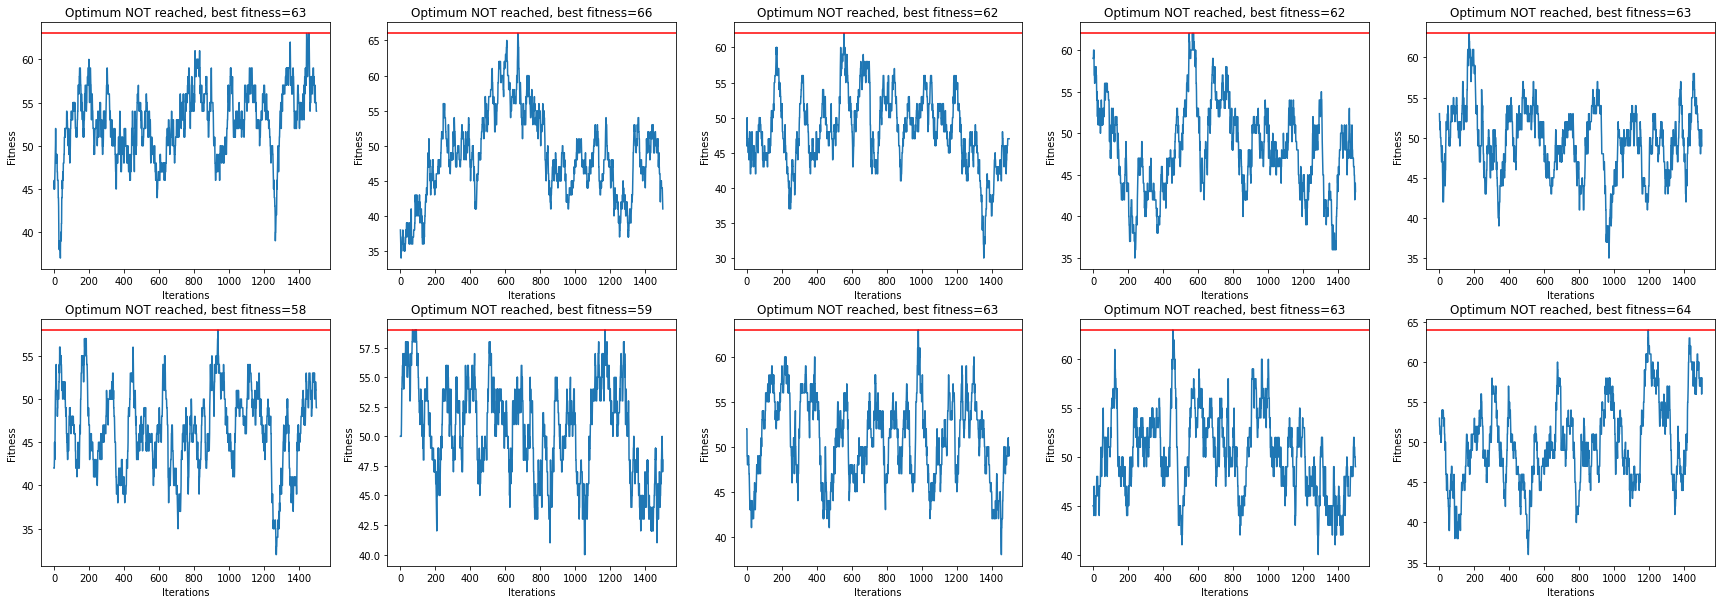

In [6]:
fig, ax = plt.subplots(2, 5,figsize=(30,10))
optimum = 0

for i in range(2):
    for j in range(5):
        x = np.random.randint(2,size=l)
        # print(x)
        final_xs, f = modified_loop(x)
        ax[i][j].plot(f)
        ax[i][j].set_ylabel("Fitness")
        ax[i][j].set_xlabel("Iterations")
        ax[i][j].axhline(y=np.max(f),color='r')
        if f[-1]==l: 
            ax[i][j].set_title(f"Optimum reached, best fitness={np.max(f)}")
            optimum += 1
        else: ax[i][j].set_title(f"Optimum NOT reached, best fitness={np.max(f)}")

print(f"{optimum} runs out of 10 have reached the optimum (fitness = {l})")


This version of the algorithm performs much worse than the first one. It does not check if the mutated string is better than the original before changing it, so it's just randomness. We can see it on the graphs, the fitness just fluctuates randomly, dropping and going up for no reason. This algorithm normally gets around 55-65 max. fitness, but at some point it may get around 70.